# Example of a CNN implementation

Import the needed libraries:

In [1]:
import keras
from keras.datasets import mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

### The dataset: MNIST

MNIST is a is a large database of handwritten digits that is commonly used for training various image processing systems.

First we download the dataset, directly segmented between training ant desting sets:

In [2]:
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [3]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

In [4]:
train_X.shape

(60000, 28, 28, 1)

We have a total of 60.000 images of 28x28 pixels.

Before starting with the model we normalize the pixel values of the image:

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

And we generate an encoding for the output transforming the class number to a vector of ones and zeros:

In [6]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

Here we can see the nine first images of the training dataset with its corresponding output value:

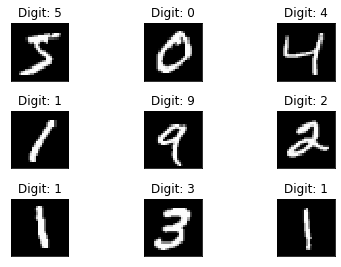

In [7]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(train_X[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(train_Y[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

Now we can start building the model:

In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))   # Down-samples the feature space
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                692288    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
_________________________________________________________________


Once defoned the model, it must be compiled assigning a certain loss function, an optimization algorithm and the evaluation metric. Then we can start the training process for all the training data samples over 10 iterations (epochs):

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history = model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 28s 30ms/step - loss: 0.3237 - accuracy: 0.9040
Epoch 2/10
938/938 [==============================] - 27s 28ms/step - loss: 0.0623 - accuracy: 0.9815
Epoch 3/10
938/938 [==============================] - 27s 28ms/step - loss: 0.0448 - accuracy: 0.9860
Epoch 4/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0335 - accuracy: 0.9897
Epoch 5/10
938/938 [==============================] - 28s 29ms/step - loss: 0.0265 - accuracy: 0.9922
Epoch 6/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 7/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 8/10
938/938 [==============================] - 28s 29ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 9/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0109 - accuracy: 0.9966
Epoch 10/10
938/938 [==============================] - 28s 30ms/step - loss: 0.009

We can plot the loss values of the network at each epoch:

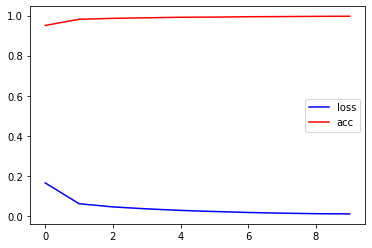

In [11]:
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['accuracy'], 'r', label='acc')
plt.legend()
plt.show()

And now that we have our model trained, we can make a prediction with unseen data using the test input samples and compare them with the test output:

In [12]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0674 - accuracy: 0.9839
Test loss 0.0673600435256958
Test accuracy 0.9839000105857849


In [14]:
predictions = model.predict(test_X)

As an example we plot the first sample of the test input and the predicted label by the model:

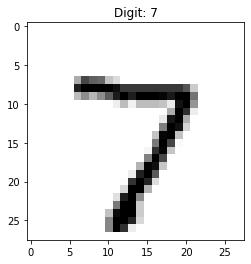

In [15]:
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.title("Digit: {}".format(np.argmax(np.round(predictions[0]))))
plt.show()